# Trabajo Práctico 1
# Grupo 3:
## Matías Vereertbrugghen, Matías Di Bernardo, Pedro Albina


# Introducción

In [1]:
import numpy as np
from generador2021 import generador as gen
import manipulacion as man
from matplotlib import pyplot as plt 

# Parte 1

In [2]:
fs = 100
T= 1/fs
t = np.arange(-5, 5+T ,T)

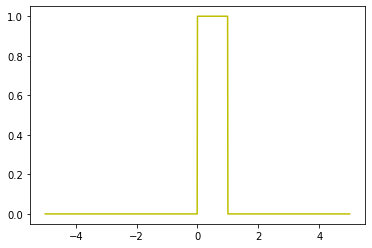

In [3]:
p = gen(t = t, fs = fs, amplitud = 1, tipo = 5, ancho = 1)
p = man.desplaza(p, fs, 0.5)

plt.figure()
plt.plot(t, p, "y")
plt.show()

In [4]:
p1 = man.desplaza(p, fs, 1)

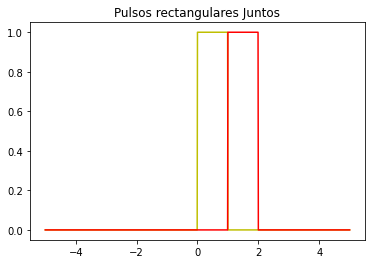

In [5]:
plt.figure()
plt.plot(t,p,"y");plt.plot(t,p1,"r")#juntas
plt.title("Pulsos rectangulares Juntos")
plt.show()

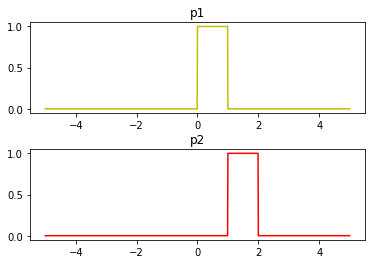

In [6]:
plt.figure()

plt.subplot(2,1,1)
plt.plot(t,p,"y")
plt.title("p1")

plt.subplot(2,1,2)
plt.plot(t,p1,"r")
plt.title("p2")

plt.subplots_adjust(hspace = 0.4)

plt.show()

# Parte 2

In [7]:
fs=100    
T=1/fs
t = np.arange(-5,5+T,T)


Modelamos $y(t) = u(t-3)x(t)$:

In [8]:
def y(t,fs,x):
    u = gen(t,fs, tipo = 8)
    u = man.desplaza(u, fs, 3)
    return u*x

Definimos $x(t) = \Pi(t)$ y la introducimos en $y(t)$:

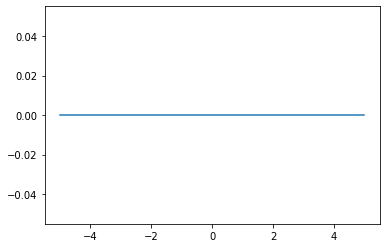

In [9]:
x = gen(t, fs, amplitud = 1, tipo = 5, ancho = 1)


#Acá metí p porque me parece que en realidad pide usar el pulso rectangular del punto anterior
plt.figure()
plt.plot(t, y(t, fs, p))
plt.show()

Como $u(t-3)$ deja de ser nula en $t=3$ pero para ese momento el pulso rectangular ya terminó, el resultado es nulo.

Ahora definiremos las funciones para verificar cada propiedad. Comenzamos por la superposición.

In [13]:

#%%

#VERIFIQUE 
#-Superposicion
#-Invarianza
#-Causalidad
        
def v_sup(t, fs, sis, x1, x2, a = 1, b = 1):    
    a = float(a)
    b = float(b)
    #plt.figure()
    #plt.plot(t, sis(a * x1 + b * x2))
    
    if (sis(t = t, fs = fs, x = a * x1 + b * x2) == a * sis(t = t, fs = fs, x = x1) +  b* sis(t = t, fs = fs, x =x2)).all():
        return print('El sistema cumple la superposición')
    else:
        #plt.figure()
        #plt.plot(t, a * sis(x1) + b* sis(x2))
        #dif = sis( a * x1 + b * x2) - ( a * sis(x1) + b* sis(x2))
        #plt.figure()
        #plt.plot(t, dif)
        return print('El sistema no cumple la superposición')

v_sup(t = t, fs = fs, sis = y, x1 = x1, x2 = x2)

El sistema cumple la superposición


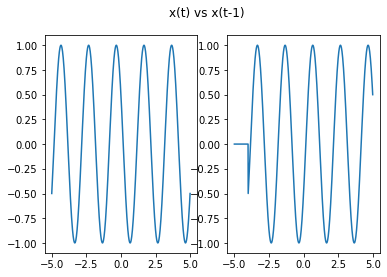

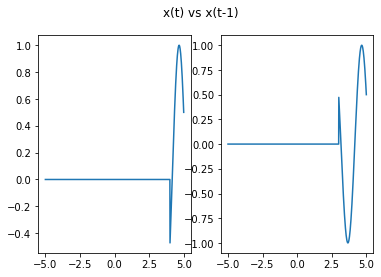

In [21]:
        
        #%%
#Verificar invariable en el tiempo       
def v_inv(t, fs, sis, x, d = 1, **kwargs):
    y = sis(t = t, fs = fs, x = x)
    yd = man.desplaza(y, fs ,d)
    xd = man.desplaza(x, fs, d)
    yxd = sis(t = t, fs = fs, x = xd)
    #Muestra las señales inicial vs la retrasada
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'x(t) vs x(t-{d})')
    ax1.plot(t, x, **kwargs)
    ax2.plot(t, xd, **kwargs)
    #Muestra la y(t-1) vs y(t) con x(t-1)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('x(t) vs x(t-1)')
    ax1.plot(t, yd, **kwargs)
    ax2.plot(t, yxd, **kwargs)
    plt.show()
    
    #if (yd == yxd).all:
     #   print("El sistema es invariable en el tiempo")
    #else:
     #   print("El sistema no es invariable en el tiempo")
v_inv(t, fs, y, x1)

In [ ]:
def v_caus(x,fs,t):
    #primero chequeamos si el sistema develve algo para una señal de entrada nula
    if (s(t,fs,0) == 0).all:


In [18]:
x1 = np.cos(np.pi*t + np.pi/3)
x2 = t**2
x3 = gen(t, fs, 1, tipo = 2)
#x3 =